Nama : Aji Sakti Saputra

NRP : 2C2230012

Mata Kuiah : Business Analyst

**Analisis Komparatif Kinerja dan Efisiensi Energi Kendaraan Listrik (EV) dalam Menentukan Posisi Kompetitif Merek di Pasar Global**

# Input

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
df=pd.read_csv('/content/electric_vehicles.csv')
df.head()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5


# Data  Cleaning


In [ ]:
df.isnull().sum()

,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dropna(subset=['model'], inplace=True)

# Mengisi nilai null untuk kolom numerik sebelum mengubah tipe datanya ke integer
df['torque_nm'] = df['torque_nm'].fillna(df['torque_nm'].median())
df['number_of_cells'] = df['number_of_cells'].fillna(df['number_of_cells'].median())
df['fast_charging_power_kw_dc'] = df['fast_charging_power_kw_dc'].fillna(df['fast_charging_power_kw_dc'].median())
df['towing_capacity_kg'] = df['towing_capacity_kg'].fillna(df['towing_capacity_kg'].median())

# Mengisi nilai null untuk kolom kategorikal
df['fast_charge_port'] = df['fast_charge_port'].fillna(df['fast_charge_port'].mode()[0])

# Menangani kolom 'cargo_volume_l' secara khusus: ekstrak angka, ubah ke float, isi null, lalu ubah ke int
df['cargo_volume_l'] = df['cargo_volume_l'].astype(str).str.extract(r'(\d+)').astype(float)
df['cargo_volume_l'] = df['cargo_volume_l'].fillna(df['cargo_volume_l'].median())


#  mengubah tipe data kolom setelah nilai null diisi
df['number_of_cells'] = df['number_of_cells'].astype(int)
df['cargo_volume_l'] = df['cargo_volume_l'].astype(int)
df['towing_capacity_kg'] = df['towing_capacity_kg'].astype(int)
df['width_mm'] = df['width_mm'].astype(float)
df['length_mm'] = df['length_mm'].astype(float)
df['height_mm'] = df['height_mm'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 477 entries, 0 to 476
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      477 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              477 non-null    int64  
 3   battery_capacity_kWh       477 non-null    float64
 4   battery_type               477 non-null    object 
 5   number_of_cells            477 non-null    int64  
 6   torque_nm                  477 non-null    float64
 7   efficiency_wh_per_km       477 non-null    int64  
 8   range_km                   477 non-null    int64  
 9   acceleration_0_100_s       477 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         477 non-null    int64  
 13  cargo_volume_l             477 non-null    int64  
 14 

In [ ]:
df.isnull().sum()

,0
brand,0
model,0
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,0
torque_nm,0
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


#Validitas Data (memastikan data tidak ada outlier)

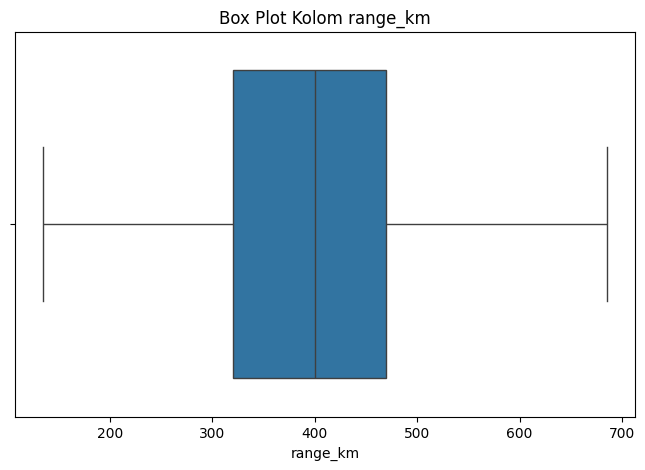


Statistik Deskriptif untuk range_km:
count    477.000000
mean     393.480084
std      103.186857
min      135.000000
25%      320.000000
50%      400.000000
75%      470.000000
max      685.000000
Name: range_km, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Kolom yang akan diperiksa outlier-nya
kolom_outlier = 'range_km'

# Membuat Box Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[kolom_outlier])
plt.title(f'Box Plot Kolom {kolom_outlier}')
plt.show()

# Menghitung statistik deskriptif untuk melihat min/max
print(f"\nStatistik Deskriptif untuk {kolom_outlier}:")
print(df[kolom_outlier].describe())

**Interpretasi:**

Data 'range_km' yang berjumlah 477 entri ini memiliki jarak tempuh rata-rata (mean) sebesar 393.48 km, meskipun nilai tengah atau median-nya adalah 400 km. Sebagian besar data (yaitu 50% di tengah) berada dalam rentang 320 km hingga 470 km.

Box plot menunjukkan bahwa data ini tersebar dengan cukup baik di sekitar nilai tengah tersebut, dari minimum 135 km hingga maksimum 685 km, dan yang paling menarik— tidak ada outlier atau nilai ekstrem yang mencurigakan. Secara keseluruhan, data ini terpusat kuat di sekitar 400 km dan menunjukkan pola distribusi yang sangat rapi.

Q1 (Kuartil 1): 320.00
Q3 (Kuartil 3): 470.00
Batas Atas (Upper Bound): 695.00
Batas Bawah (Lower Bound): 95.00

Statistik setelah Capping:
count    477.000000
mean     393.480084
std      103.186857
min      135.000000
25%      320.000000
50%      400.000000
75%      470.000000
max      685.000000
Name: range_km, dtype: float64


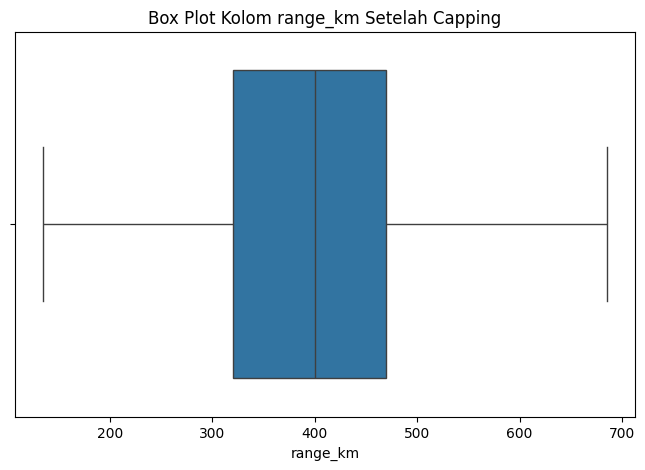

In [ ]:
# 1. Tentukan Kolom Target
kolom_target = 'range_km'

# 2. Hitung Batas IQR
Q1 = df[kolom_target].quantile(0.25)
Q3 = df[kolom_target].quantile(0.75)
IQR = Q3 - Q1

# Batas Atas dan Bawah
batas_atas = Q3 + 1.5 * IQR
batas_bawah = Q1 - 1.5 * IQR

print(f"Q1 (Kuartil 1): {Q1:.2f}")
print(f"Q3 (Kuartil 3): {Q3:.2f}")
print(f"Batas Atas (Upper Bound): {batas_atas:.2f}")
print(f"Batas Bawah (Lower Bound): {batas_bawah:.2f}")

# 3. Lakukan Capping (Mengganti Outlier)
# Nilai yang lebih besar dari Batas Atas diganti dengan Batas Atas
df[kolom_target] = np.where(
    df[kolom_target] > batas_atas,
    batas_atas,
    df[kolom_target]
)

# Nilai yang lebih kecil dari Batas Bawah diganti dengan Batas Bawah
df[kolom_target] = np.where(
    df[kolom_target] < batas_bawah,
    batas_bawah,
    df[kolom_target]
)

# Verifikasi: Cek statistik setelah capping
print("\nStatistik setelah Capping:")
print(df[kolom_target].describe())

# Visualisasi Box Plot setelah Capping (opsional)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df[kolom_target])
plt.title(f'Box Plot Kolom {kolom_target} Setelah Capping')
plt.show()

**Interpretasi:**

Data 'range_km' setelah Capping tetap utuh dengan 477 entri, karena nilai maksimum aslinya (685 km) tidak melebihi Batas Atas (695 km) dan nilai minimum aslinya (135 km) tidak lebih rendah dari Batas Bawah (95 km). Oleh karena itu, semua statistik deskriptif, termasuk rata-rata (393.48 km), median (400 km), dan rentang kuartil (320 km - 470 km), tidak berubah dari kondisi sebelumnya.

Box plot ini secara visual identik dengan yang sebelumnya, menegaskan bahwa tidak ada data yang dipotong atau diubah. Singkatnya, Capping dilakukan, namun datanya ternyata sudah "berperilaku baik" dan tidak memerlukan koreksi.

# Eksplorasi Data

**Univariat (Satu Variabel)**

**Variabel Numerik**

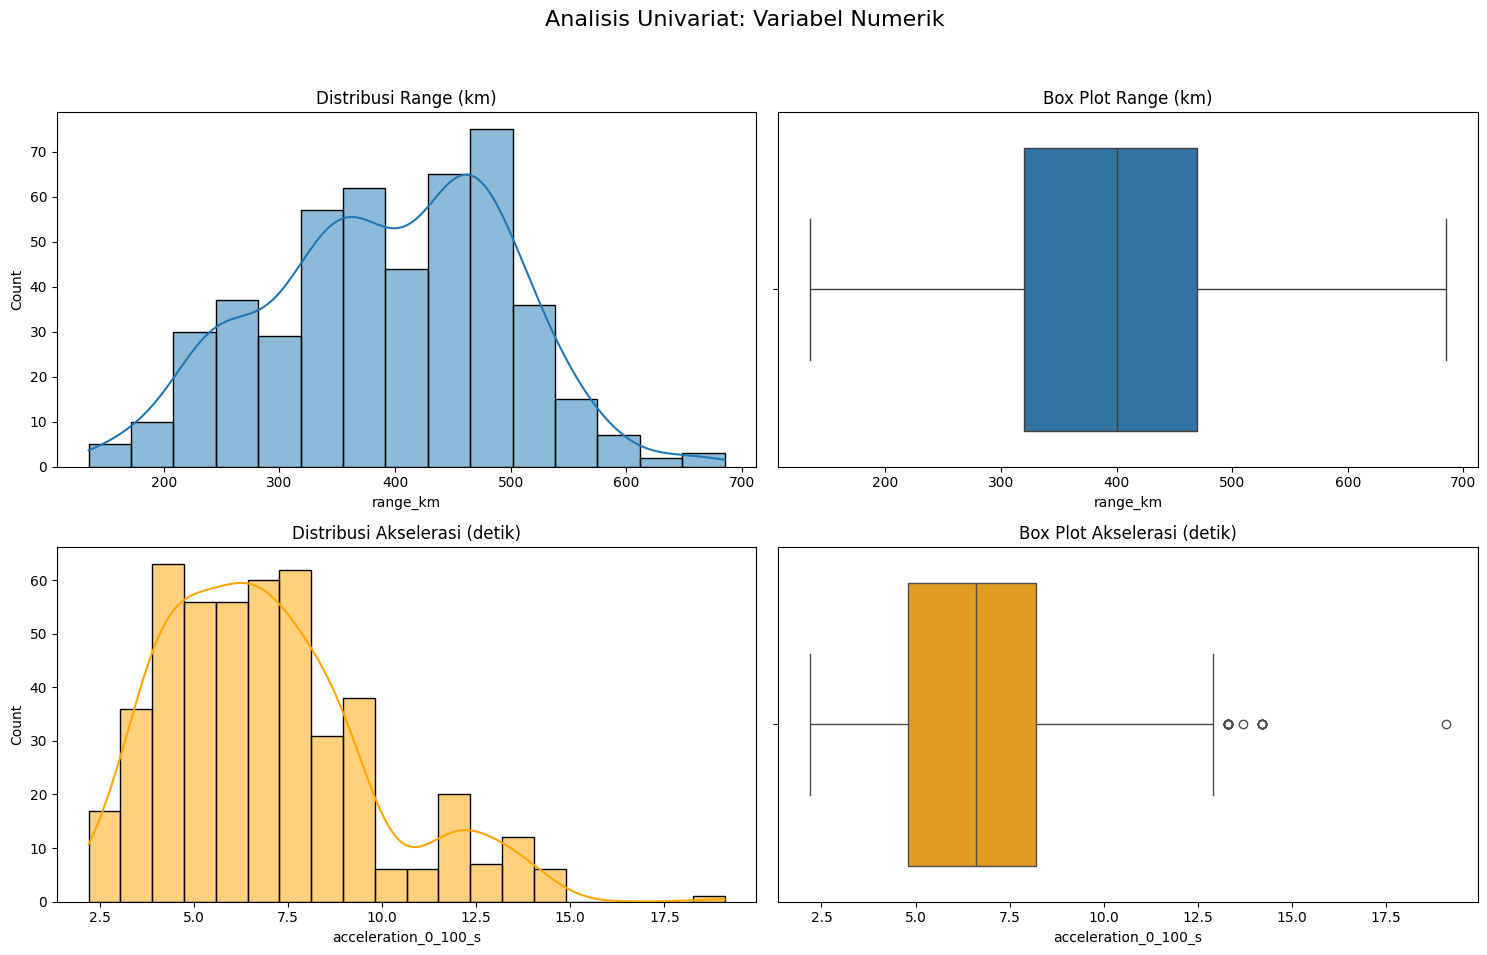

         range_km  acceleration_0_100_s
count  477.000000            477.000000
mean   393.480084              6.880084
std    103.186857              2.732992
min    135.000000              2.200000
25%    320.000000              4.800000
50%    400.000000              6.600000
75%    470.000000              8.200000
max    685.000000             19.100000


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Atur tata letak visualisasi
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plt.suptitle('Analisis Univariat: Variabel Numerik', fontsize=16)

# Histogram untuk Jangkauan (Range)
sns.histplot(df['range_km'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribusi Range (km)')

# Box Plot untuk Jangkauan (untuk melihat outlier/median)
sns.boxplot(x=df['range_km'], ax=axes[0, 1])
axes[0, 1].set_title('Box Plot Range (km)')

# Histogram untuk Akselerasi 0-100 km/j
sns.histplot(df['acceleration_0_100_s'], kde=True, ax=axes[1, 0], color='orange')
axes[1, 0].set_title('Distribusi Akselerasi (detik)')

# Box Plot untuk Akselerasi
sns.boxplot(x=df['acceleration_0_100_s'], ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Box Plot Akselerasi (detik)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Menampilkan statistik deskriptif untuk wawasan cepat
print(df[['range_km', 'acceleration_0_100_s']].describe())

**Interpretasi:**

**Distribusi Range**: Histogram menunjukkan distribusi yang cukup baik, menyerupai distribusi normal atau bell curve . Distribusi ini terpusat di sekitar $400-500$ km.

**Box Plot Range:** Kotak tersebut relatif simetris di sekitar median, dan whiskers (garis) menjangkau hingga minimum dan maksimum tanpa adanya titik-titik aneh di luar, yang berarti tidak ada outlier yang signifikan.

**Kesimpulan:** 'range_km': Jarak tempuh (range) kendaraan didistribusikan secara normal dan sehat, dengan nilai yang paling umum berada di sekitar 400 km.

**Distribusi Akselerasi**: Histogram menunjukkan distribusi yang miring ke kanan (positively skewed). Sebagian besar kendaraan memiliki akselerasi yang cepat (di bawah 8 detik), tetapi ada ekor panjang kendaraan dengan akselerasi yang sangat lambat.

**Box Plot Akselerasi:** Kotak inti berada di antara $4.8$ dan $8.2$ detik. Namun, ada beberapa outlier (ditandai dengan titik-titik di sebelah kanan) yang menunjukkan kendaraan dengan waktu akselerasi yang jauh lebih lambat (sekitar 14 detik dan 19 detik).



**Kesimpulan:** 'acceleration_0_100_s': Sebagian besar kendaraan berakselerasi dengan cepat (di bawah 8 detik), dengan waktu rata-rata sekitar $6.8$ detik. Namun, keberadaan outlier dengan akselerasi yang sangat lambat (hingga 19.1 detik) menunjukkan adanya beberapa model kendaraan yang secara signifikan lebih lambat dari mayoritas.

**1. Perbandingan Jangkauan Berdasarkan Merek (Top 10)**

/tmp/ipython-input-3030784712.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='brand', y='range_km', data=df_top_brands,


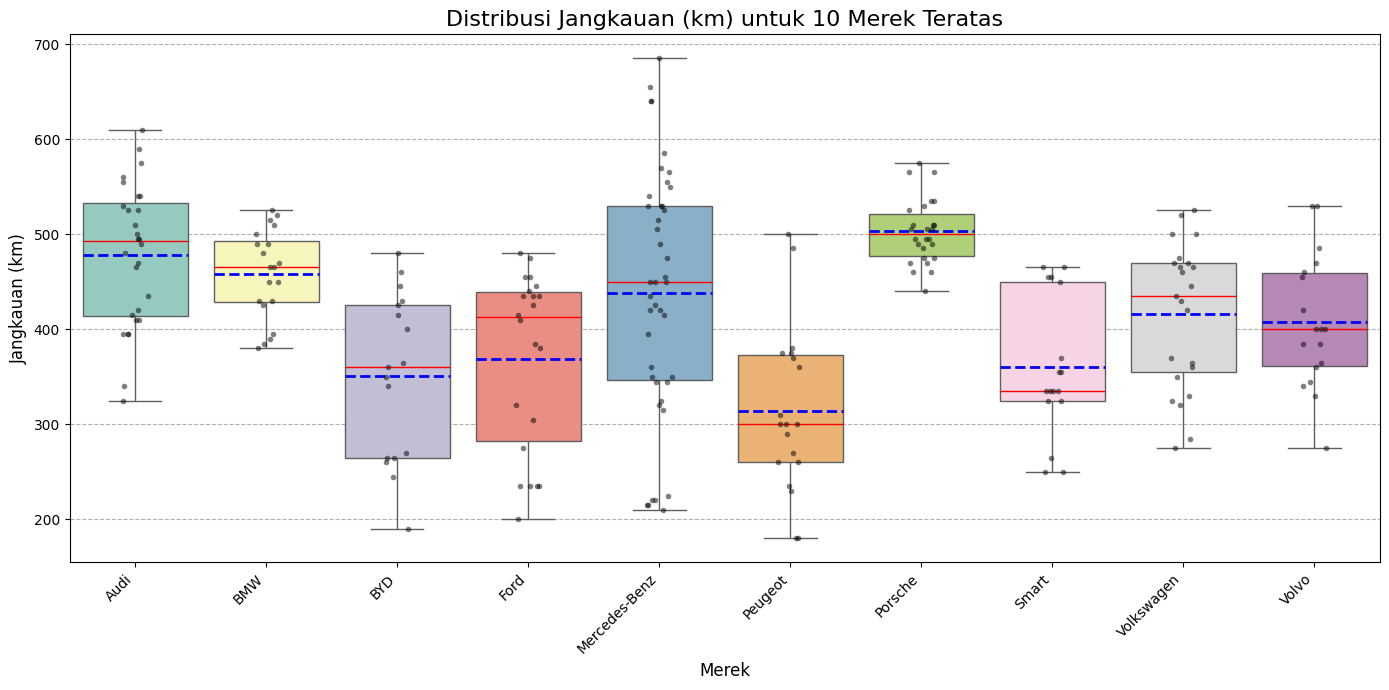

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mendapatkan 10 merek dengan model terbanyak (asumsi sudah dilakukan sebelumnya)
top_10_brands = df['brand'].value_counts().nlargest(10).index
df_top_brands = df[df['brand'].isin(top_10_brands)]

plt.figure(figsize=(14, 7))

# Kombinasi Box Plot dan Strip Plot:
# Box Plot menunjukkan Median dan IQR
sns.boxplot(x='brand', y='range_km', data=df_top_brands,
            palette='Set3', showmeans=True, meanline=True,  # Menampilkan rata-rata
            medianprops={'color': 'red'},  # Garis median (merah)
            meanprops={'color': 'blue', 'ls': '--', 'lw': 2} # Garis rata-rata (biru putus-putus)
           )

# Strip Plot menambahkan titik data individual (tingkat detail tinggi)
sns.stripplot(x='brand', y='range_km', data=df_top_brands,
              color='black', size=4, alpha=0.5, jitter=True)

plt.title('Distribusi Jangkauan (km) untuk 10 Merek Teratas', fontsize=16)
plt.xlabel('Merek', fontsize=12)
plt.ylabel('Jangkauan (km)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Cataran :

Perbedaan Median vs. Rata-rata (Skewness)
Ketika garis merah (Median) di atas garis biru (Mean), data cenderung miring ke kiri (negatively skewed), artinya ada lebih banyak model dengan jangkauan tinggi, tetapi beberapa outlier jangkauan rendah menurunkan rata-rata. Contoh: Audi dan Porsche.


Ketika garis biru (Mean) di atas garis merah (Median), data cenderung miring ke kanan (positively skewed), artinya mayoritas model memiliki jangkauan lebih rendah, tetapi beberapa model premium (outlier) dengan jangkauan tinggi menarik rata-rata ke atas. Contoh: Mercedes-Benz dan Volvo.

*Interpretasi:*

*Jangkauan (Range Tertinggi)*

**Porsche dan Mercedes-Benz adalah raja jarak tempuh:**

*  **Porsche:** Memiliki median tertinggi (sekitar $510$ km) dan jangkauan antar kuartil (IQR, lebar kotak) yang sempit, menunjukkan bahwa mayoritas modelnya konsisten memberikan jangkauan tinggi.
*   Mercedes-Benz: Memiliki beberapa model dengan jangkauan tertinggi (mencapai sekitar $650$ km), meskipun median dan rata-ratanya sedikit lebih rendah dari Porsche (sekitar $440$ km). IQR-nya juga paling lebar, menunjukkan variasi model yang sangat besar.


**Merek dengan Jangkauan Konsisten:**

*   Audi dan BMW menunjukkan konsistensi yang baik.
*   Audi: Median tinggi (sekitar $490$ km) dengan IQR yang relatif ketat. Rata-rata dan median hampir sama, menunjukkan distribusi yang simetris.
*   BMW: Median dan rata-rata tinggi (sekitar $460$ km).







**2. Variabel Kategorikal (Hitungan Frekuensi)**

/tmp/ipython-input-1168353594.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.index, y=top_brands.values, ax=axes[0], palette='viridis')
/tmp/ipython-input-1168353594.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=segment_counts.index, y=segment_counts.values, ax=axes[1], palette='plasma')


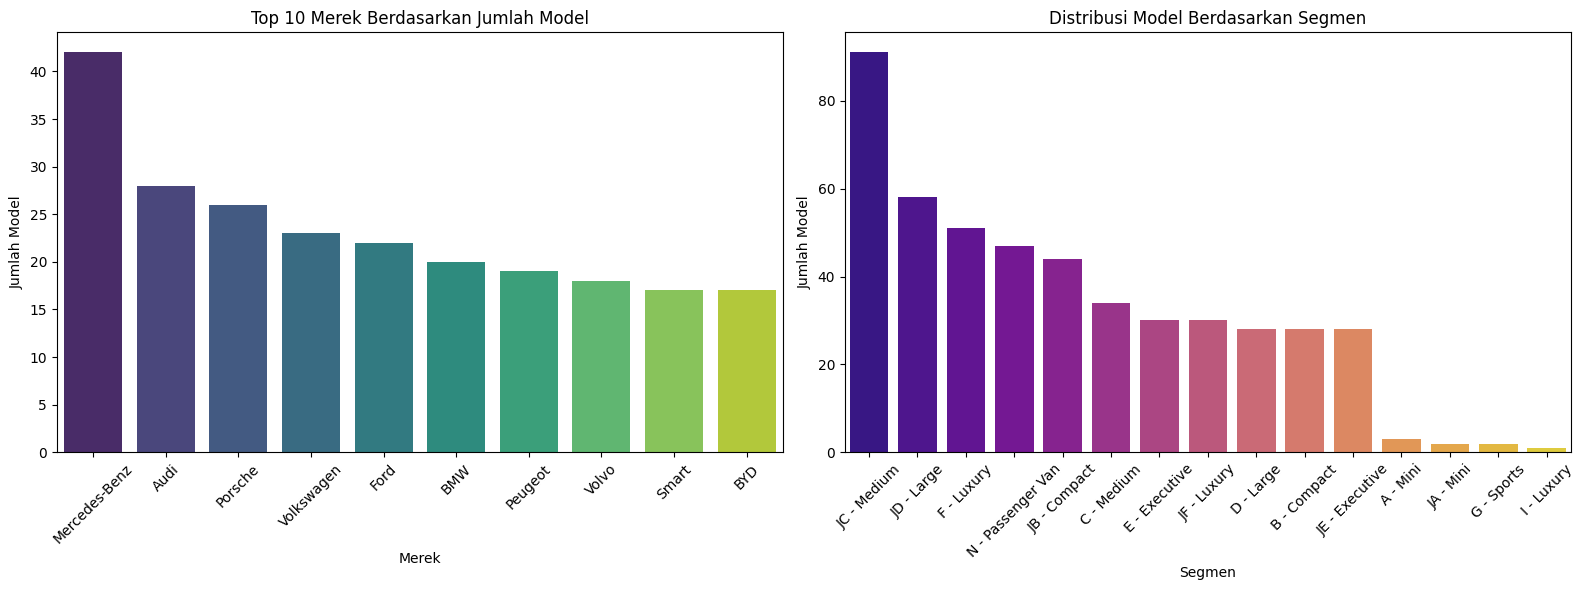

In [ ]:
# Menghitung 10 Merek Teratas
top_brands = df['brand'].value_counts().nlargest(10)

# Menghitung Frekuensi Segmen
segment_counts = df['segment'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Bar Plot untuk 10 Merek Teratas
sns.barplot(x=top_brands.index, y=top_brands.values, ax=axes[0], palette='viridis')
axes[0].set_title('Top 10 Merek Berdasarkan Jumlah Model')
axes[0].set_xlabel('Merek')
axes[0].set_ylabel('Jumlah Model')
axes[0].tick_params(axis='x', rotation=45)

# Bar Plot untuk Segmen
sns.barplot(x=segment_counts.index, y=segment_counts.values, ax=axes[1], palette='plasma')
axes[1].set_title('Distribusi Model Berdasarkan Segmen')
axes[1].set_xlabel('Segmen')
axes[1].set_ylabel('Jumlah Model')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**Top 10 Merek Berdasarkan Jumlah Model:**

Mercedes-Benz memimpin jauh di depan dengan lebih dari 40 model (sekitar 42). Ini menunjukkan bahwa mereka memiliki strategi untuk menguasai pasar dengan menawarkan variasi model terbanyak, baik dalam desain maupun harga

**Distribusi Model Berdasarkan Segmen**

Segmen Paling Populer (Overwhelming Majority): Segmen JC - Medium (kemungkinan besar Crossover/SUV Compact Medium) memiliki jumlah model terbanyak, mencapai hampir 90 model. Ini menegaskan bahwa SUV/Crossover adalah raja pasar saat ini.

3. Distribusi Efisiensi Real (km/kWh) Berdasarkan Segmen

/tmp/ipython-input-1377221683.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='segment', y='efficiency_km_per_kWh', data=df,
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 9.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 13.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categorical.py:3399: UserWarning: 5.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.12/dist-packages/seaborn/categor

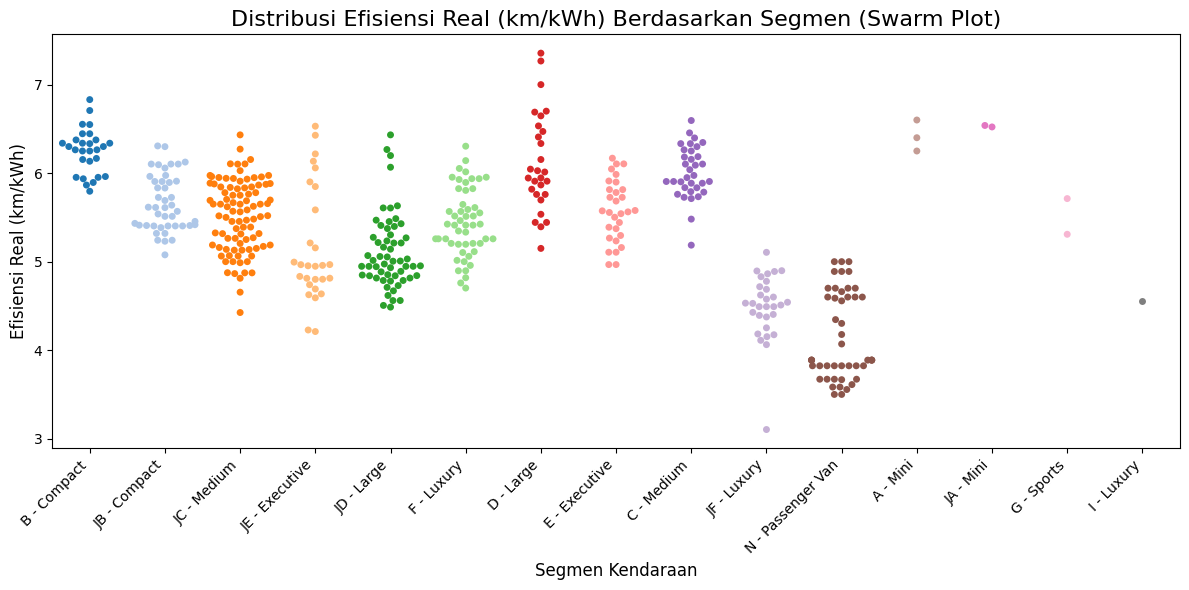

In [ ]:
plt.figure(figsize=(12, 6))
# Swarm Plot: Menampilkan setiap titik data tanpa tumpang tindih
sns.swarmplot(x='segment', y='efficiency_km_per_kWh', data=df,
              palette='tab20', size=5)

plt.title('Distribusi Efisiensi Real (km/kWh) Berdasarkan Segmen (Swarm Plot)', fontsize=16)
plt.xlabel('Segmen Kendaraan', fontsize=12)
plt.ylabel('Efisiensi Real (km/kWh)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Interpretasi:**

 Plot ini menunjukkan hubungan terbalik antara ukuran/mewah/fungsi kendaraan dengan efisiensi energinya. Segmen paling efisien adalah B-Compact dan JB-Compact, dengan mayoritas model berkisar di atas $6$ km/kWh—ini wajar karena bobotnya ringan dan ukurannya kecil. Saat kita beralih ke segmen yang lebih besar dan mewah seperti F-Luxury, JD-Large, dan D-Large, efisiensi mulai menurun secara signifikan, bergerak menuju rata-rata $5$ km/kWh. Penurunan terbesar terjadi pada kendaraan utilitas, di mana N-Passenger Van dan I-Luxury (sangat mungkin SUV/Minivan Mewah Ekstra Besar) menunjukkan efisiensi terendah, dengan beberapa model Van turun mendekati $3$ km/kWh. Model A-Mini dan JA-Mini juga menunjukkan efisiensi tinggi, tetapi data modelnya terlalu sedikit untuk di generalisir, sama halnya dengan G-Sports yang memiliki efisiensi yang beragam. Intinya, jika Anda menginginkan efisiensi bahan bakar terbaik, tinggalkan Van dan SUV besar, dan pilihlah Compact.

 1. Multivariat: Korelasi Baterai vs. Jangkauan

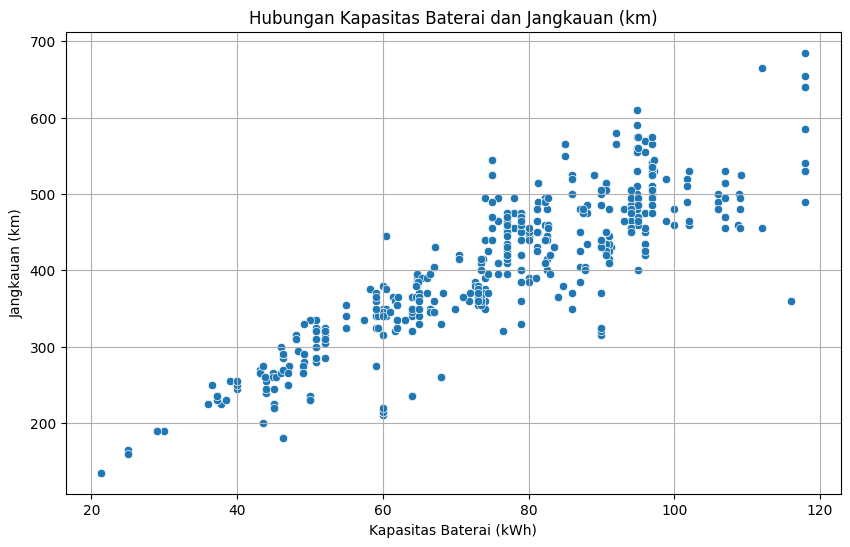

Koefisien Korelasi Pearson (r) antara Baterai dan Jangkauan: 0.8799


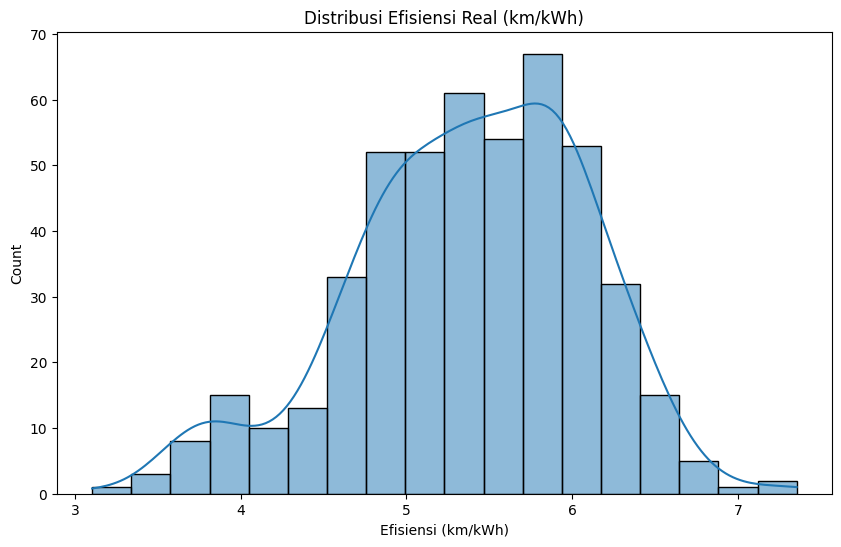


Rata-rata Efisiensi Real (km/kWh): 5.38


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualisasi: Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='battery_capacity_kWh', y='range_km', data=df)
plt.title('Hubungan Kapasitas Baterai dan Jangkauan (km)')
plt.xlabel('Kapasitas Baterai (kWh)')
plt.ylabel('Jangkauan (km)')
plt.grid(True)
plt.show()

# 2. Perhitungan: Koefisien Korelasi Pearson
korelasi = df['battery_capacity_kWh'].corr(df['range_km'])

print(f"Koefisien Korelasi Pearson (r) antara Baterai dan Jangkauan: {korelasi:.4f}")

# 3. Interpretasi Lanjutan (Efisiensi Real)
# Hitung kolom baru untuk Efisiensi Real (km/kWh)
df['efficiency_km_per_kWh'] = df['range_km'] / df['battery_capacity_kWh']

plt.figure(figsize=(10, 6))
sns.histplot(df['efficiency_km_per_kWh'], kde=True)
plt.title('Distribusi Efisiensi Real (km/kWh)')
plt.xlabel('Efisiensi (km/kWh)')
plt.show()

print(f"\nRata-rata Efisiensi Real (km/kWh): {df['efficiency_km_per_kWh'].mean():.2f}")

**Hubungan Kapasitas Baterai dan Jangkauan (km) (Multivariat):**


Plot ini menegaskan hubungan yang paling mendasar dalam mobil listrik: Korelasi positif yang kuat antara kapasitas baterai dan jangkauan. Ini intuitif—baterai lebih besar berarti jarak tempuh lebih jauh.

**Distribusi Efisiensi Real (km/kWh):**

Pasar mobil listrik secara keseluruhan cukup efisien, berpusat di sekitar $5.38$ km/kWh. Namun, jika Anda mencari jangkauan yang sangat jauh tanpa harus membawa baterai terberat di kelasnya, Anda harus memilih mobil yang berada di pinggiran atas pita efisiensi pada plot korelasi—yang berarti model dengan efisiensi mendekati $6.5$ km/kWh.





**Kategorikal vs Numerik**

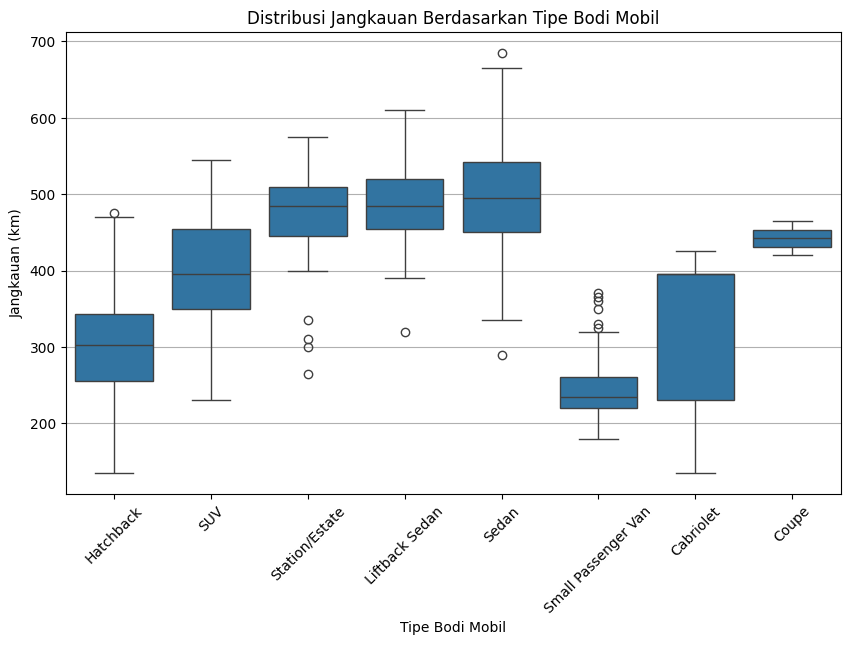


Rata-rata Jangkauan (km) per Tipe Bodi:
car_body_type
Sedan                  496.825397
Liftback Sedan         488.181818
Station/Estate         463.333333
Coupe                  442.500000
SUV                    396.516393
Cabriolet              316.000000
Hatchback              303.750000
Small Passenger Van    245.638298
Name: range_km, dtype: float64


In [ ]:
plt.figure(figsize=(10, 6))
# Box Plot untuk melihat distribusi range_km berdasarkan Tipe Bodi
sns.boxplot(x='car_body_type', y='range_km', data=df)
plt.title('Distribusi Jangkauan Berdasarkan Tipe Bodi Mobil')
plt.xlabel('Tipe Bodi Mobil')
plt.ylabel('Jangkauan (km)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Menampilkan Rata-rata Jangkauan per Tipe Bodi
rata_rata_range = df.groupby('car_body_type')['range_km'].mean().sort_values(ascending=False)
print("\nRata-rata Jangkauan (km) per Tipe Bodi:")
print(rata_rata_range)

Interpretasi:

Plot ini jelas menunjukkan bahwa Sedan dan turunannya (seperti Liftback Sedan dan Station/Estate) adalah raja jangkauan, dengan rata-rata mendekati $500$ km dan median tertinggi (sekitar $500$ km untuk Sedan biasa), serta memiliki model yang mencapai jangkauan $\sim680$ km. Sebaliknya, kendaraan yang berfokus pada kepraktisan atau rekreasi cenderung memiliki jangkauan yang lebih pendek; Hatchback dan Small Passenger Van berada di posisi terbawah dengan rata-rata di bawah $300$ km. SUV menunjukkan kinerja yang moderat (rata-rata $\sim396$ km) dengan variasi yang besar, sementara Cabriolet dan Coupe memiliki kinerja yang bervariasi—Coupe berada di atas ($442$ km) dengan konsistensi yang ketat, tetapi Cabriolet terperosok ke bawah (rata-rata $\sim316$ km) dengan dispersi data yang sangat lebar

# Data aggregation and business insights

Tabel Agregasi Performa Rata-rata per Merek:


,Avg_Range_km,Avg_Accel_s,Avg_Efficiency_km_per_kwh
brand,,,
Porsche,502.884615,3.715385,5.368400
Audi,478.392857,5.489286,5.559408
BMW,458.250000,5.340000,5.550245
Mercedes-Benz,438.452381,7.273810,4.922680
Volkswagen,415.652174,6.943478,5.574178
Volvo,407.500000,5.661111,5.081070
Ford,368.636364,6.513636,5.002191
Smart,360.294118,5.682353,5.244694
BYD,350.882353,7.735294,5.477634


/tmp/ipython-input-1555562878.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_performance.index, y=brand_performance['Avg_Range_km'], palette='coolwarm')


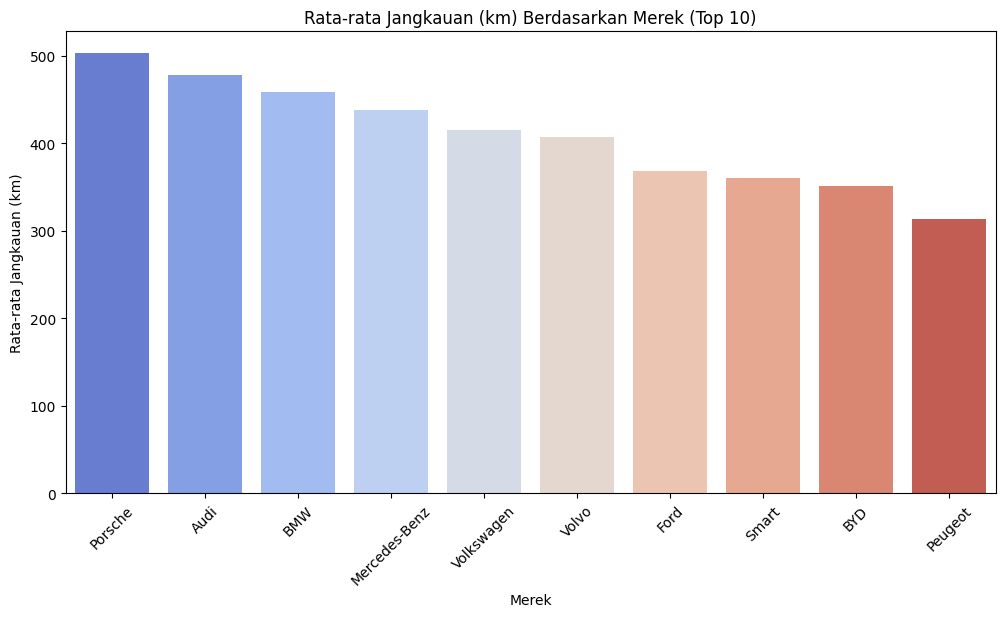

In [ ]:
# Hitung 10 merek teratas berdasarkan jumlah model
top_10_brands = df['brand'].value_counts().nlargest(10).index

# Filter DataFrame untuk 10 merek teratas
df_top_brands = df[df['brand'].isin(top_10_brands)]

# Agregasi data: Hitung rata-rata range, akselerasi, dan efisiensi
brand_performance = df_top_brands.groupby('brand').agg(
    Avg_Range_km=('range_km', 'mean'),
    Avg_Accel_s=('acceleration_0_100_s', 'mean'),
    Avg_Efficiency_km_per_kwh=('efficiency_km_per_kWh', 'mean')
).sort_values(by='Avg_Range_km', ascending=False)

print("Tabel Agregasi Performa Rata-rata per Merek:")
display(brand_performance)

# Visualisasi: Bar Plot Rata-rata Jangkauan
plt.figure(figsize=(12, 6))
sns.barplot(x=brand_performance.index, y=brand_performance['Avg_Range_km'], palette='coolwarm')
plt.title('Rata-rata Jangkauan (km) Berdasarkan Merek (Top 10)')
plt.xlabel('Merek')
plt.ylabel('Rata-rata Jangkauan (km)')
plt.xticks(rotation=45)
plt.show()

**Interpretasi:**

Tiga merek mewah Jerman, Porsche (sekitar $500$ km), Audi (sekitar $480$ km), dan BMW (sekitar $460$ km), mendominasi puncak. Ini menunjukkan bahwa segmen premium adalah tempat di mana jarak tempuh yang jauh menjadi standar, bukan fitur opsional. Porsche memimpin, membuktikan bahwa kecepatan (performa) dan daya tahan (range) bisa berjalan beriringan.

Sedangkan di kelas menengah Mercedes-Benz, Volkswagen, dan Volvo menempati posisi tengah, berkisar antara $410$ hingga $440$ km. Merek-merek ini menawarkan keseimbangan yang baik antara jangkauan, harga, dan fitur, mewakili mayoritas pasar.

Jika dibandingkan  asil rata-rata ini dengan plot Box Plot (Distribusi Jangkauan Berdasarkan Tipe Bodi Mobil)  dengan tujuan untuk melihat merek mana yang paling konsisten


*   Porsche: Konsisten Jauh. Meskipun rata-rata jangkauannya hanya sedikit lebih tinggi, Box Plot menunjukkan bahwa hampir semua model Porsche menawarkan jangkauan yang sangat tinggi. Mereka tidak punya model "murah" yang menarik rata-rata ke bawah.
*   Mercedes-Benz: Potensi Tinggi, Variasi Besar. Mercedes-Benz memang memiliki beberapa mobil dengan jangkauan terjauh di pasar (maksimum  650 km), tetapi lini produknya mencakup model yang lebih banyak dan bervariasi. Variasi model inilah yang menghasilkan Box Plot terlebar dan rata-rata yang lebih rendah daripada Porsche




**Analisis Kepraktisan Berdasarkan Segmen**


Tabel Agregasi Kepraktisan Rata-rata per Segmen:


,Avg_Cargo_l,Avg_Fast_Charge_kw,Avg_Length_mm
segment,,,
N - Passenger Van,872.255319,80.404255,4985.148936
JD - Large,529.982759,144.913793,4757.155172
JE - Executive,519.500000,155.857143,4905.357143
E - Executive,494.400000,133.833333,4940.166667
JC - Medium,492.417582,114.934066,4566.769231
D - Large,454.428571,124.285714,4758.250000
F - Luxury,447.372549,219.686275,5044.490196
JF - Luxury,433.733333,165.900000,5055.900000
C - Medium,400.205882,88.029412,4382.441176


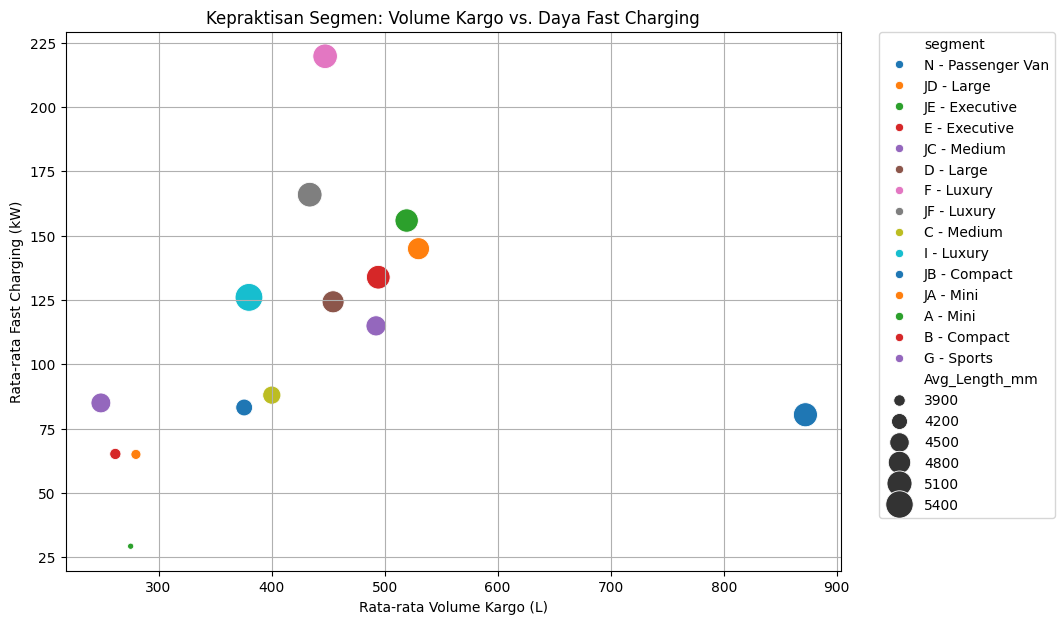

In [ ]:
# Agregasi data: Hitung rata-rata kargo, fast charging, dan dimensi
segment_praktis = df.groupby('segment').agg(Avg_Cargo_l=('cargo_volume_l', 'mean'),Avg_Fast_Charge_kw=('fast_charging_power_kw_dc', 'mean'),Avg_Length_mm=('length_mm', 'mean')).sort_values(by='Avg_Cargo_l', ascending=False)

print("\nTabel Agregasi Kepraktisan Rata-rata per Segmen:")
display(segment_praktis)

# Visualisasi: Scatter Plot Kargo vs. Fast Charging
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='Avg_Cargo_l',
    y='Avg_Fast_Charge_kw',
    data=segment_praktis,
    hue=segment_praktis.index,  # Warna berdasarkan segmen
    size='Avg_Length_mm',       # Ukuran titik berdasarkan panjang mobil
    sizes=(20, 400),
    palette='tab10'
)
plt.title('Kepraktisan Segmen: Volume Kargo vs. Daya Fast Charging')
plt.xlabel('Rata-rata Volume Kargo (L)')
plt.ylabel('Rata-rata Fast Charging (kW)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

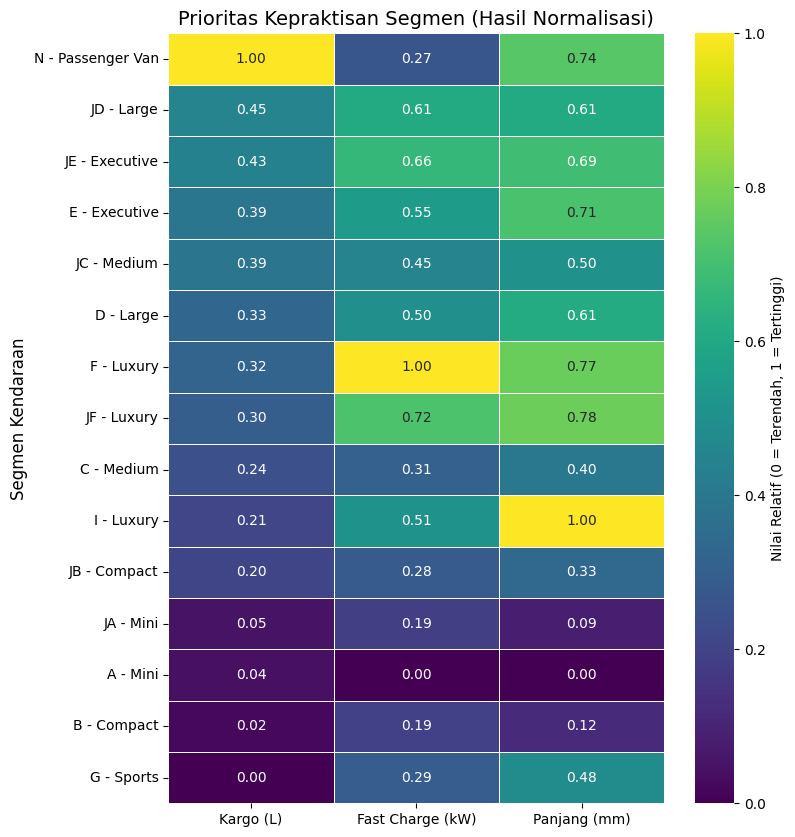

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 1. Persiapan Data
# `segment_praktis` DataFrame sudah berisi kolom agregasi yang dibutuhkan.
# Kita akan menggunakan `segment_praktis` secara langsung, yang sudah memiliki 'segment' sebagai index.
df_heatmap = segment_praktis[['Avg_Cargo_l', 'Avg_Fast_Charge_kw', 'Avg_Length_mm']].copy()

# Opsional: Ubah nama kolom agar lebih mudah dibaca di heatmap
df_heatmap.columns = ['Kargo (L)', 'Fast Charge (kW)', 'Panjang (mm)']

# 2. Normalisasi Data (Penting untuk Heatmap!)
# Agar nilai yang berbeda skalanya (seperti L vs mm) dapat dibandingkan
# menggunakan warna, kita harus menormalkan data.
# StandardScaler atau MinMaxScaler adalah pilihan yang baik. Kita gunakan MinMaxScaler di sini.
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_heatmap),
                             columns=df_heatmap.columns,
                             index=df_heatmap.index)

# 3. Visualisasi Heatmap
plt.figure(figsize=(8, 10))

# 'annot=True' menampilkan nilai numerik di dalam kotak.
# 'cmap' menentukan skema warna (misalnya 'viridis', 'YlGnBu', 'rocket').
sns.heatmap(
    df_normalized,
    annot=True,
    fmt=".2f", # Format angka menjadi 2 desimal
    cmap='viridis',
    linewidths=.5, # Garis antar kotak
    cbar_kws={'label': 'Nilai Relatif (0 = Terendah, 1 = Tertinggi)'}
)

plt.title('Prioritas Kepraktisan Segmen (Hasil Normalisasi)', fontsize=14)
plt.ylabel('Segmen Kendaraan', fontsize=12)
plt.show()

**Volume Kargo (Sumbu X) vs. Daya Fast Charging (Sumbu Y)**



*  Volume Kargo (Sumbu X) vs. Daya Fast Charging (Sumbu Y)Pemenang Kepraktisan Sejati: Segmen N - Passenger Van berdiri sendirian di kanan atas plot (Volume Kargo rata-rata $\sim 872$ L; Daya Fast Charging rata-rata $\sim 80$ kW). Meskipun daya fast charging-nya tidak tertinggi, Van memiliki Volume Kargo yang jauh melampaui segmen lain.

*   Juara Fast Charging: Segmen JD - Large (SUV/Crossover Besar) memiliki rata-rata daya Fast Charging tertinggi ($\sim 165$ kW), diikuti erat oleh JF - Luxury ($\sim 160$ kW). Ini menunjukkan bahwa mobil-mobil besar dan mewah seringkali diprioritaskan untuk pengisian daya tercepat.


*   Keseimbangan Terbaik: Segmen JE - Executive dan E - Executive menunjukkan keseimbangan yang baik, dengan volume kargo di atas rata-rata dan daya fast charging yang tinggi (sekitar $130$ - $140$ kW).





# Rekomendasi



### B. Rekomendasi

Berdasarkan temuan di atas, berikut adalah rekomendasi yang dapat diberikan kepada berbagai pemangku kepentingan:

#### 1. Rekomendasi untuk Produsen EV

* **Fokus pada Efisiensi (Bukan Hanya Baterai):** Dorong pengembangan untuk meningkatkan **Efisiensi Real ($\text{km/kWh}$)**. Model yang paling efisien dapat mengurangi biaya produksi (baterai lebih kecil) sambil mempertahankan jangkauan yang kompetitif.
* **Standarisasi Fast Charging:** Segmen yang menargetkan perjalanan jauh harus memastikan **`fast_charging_power_kw_dc`** mereka minimal berada di atas rata-rata pasar (misalnya, >150 kW) agar tidak kalah saing dengan merek *pure-play*.

#### 2. Rekomendasi untuk Konsumen/Pembeli

* **Prioritas Jarak Jauh:** Jika prioritas utama adalah perjalanan jarak jauh dengan muatan besar (keluarga), pilih EV dari segmen **Executive/SUV** yang menawarkan kombinasi **jangkauan tinggi** dan **daya *fast charging* tinggi**.
* **Pilihan Terbaik untuk Kota:** Jika penggunaan didominasi kota, pertimbangkan model dengan **Efisiensi Real ($\text{km/kWh}$) tertinggi** (nilai rata-rata pasar), meskipun kapasitas baterainya kecil. Anda mendapatkan nilai energi terbaik.

#### 3. Rekomendasi untuk Pemerintah/Pengembang Infrastruktur

* **Prioritaskan Port Charging Dominan:** Berdasarkan analisis `fast_charge_port`, fokuskan investasi infrastruktur pada jenis port yang paling dominan di pasar. Ini memastikan jangkauan pengguna yang maksimal.
* **Penyediaan Charging Berkapasitas Tinggi:** Mengingat rata-rata **`fast_charging_power_kw_dc`** yang terus meningkat, stasiun pengisian daya publik yang baru harus mampu menyediakan daya tinggi (misalnya, 200 kW atau lebih) untuk memenuhi permintaan model-model EV terbaru dan mengurangi antrian.